### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import warnings
import csv
import pandas as pd
warnings.filterwarnings('ignore')
%matplotlib inline

### Implementation of scraping function:

In [132]:
def weather_tracking(url, city):
    source = requests.get(url).text
    soup = BeautifulSoup(source, "lxml")
    L =[]

    for element in soup.find_all("div", class_="DetailsSummary--DetailsSummary--1DqhO DetailsSummary--fadeOnOpen--KnNyF"):

        D = {}
        D["temp_day"] = element.find('h3').text
        D["temp_max"] = element.find('span', class_="DetailsSummary--highTempValue--3PjlX").text
        D["temp_min"] = element.find('span', class_='DetailsSummary--lowTempValue--2tesQ').text
        D["day_climate"] = element.find('span', class_='DetailsSummary--extendedData--307Ax').text

        L.append(D)
    convert = pd.DataFrame(L)
    filename=city+"_weather.csv"
    convert.to_csv(filename)

### Access to the website for Marrakech and recall function

In [95]:
for city in soup.find("span", class_="LocationPageTitle--PresentationName--1AMA6"):
    print(city)

Ben Guerir, Marrakesh-Safi, Morocco


In [133]:
url_bengrir='https://weather.com/weather/tenday/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111'
city="bengrir"
weather_tracking(url, city)

### Link to the website for Tanger city and recall function

In [111]:
url_tanger = 'https://weather.com/weather/tenday/l/d85f06e72cf2831588a6321bed1d67ed17af1d3d7fe060cc7f2c5ccbfa35e911'
city="tanger"
weather_tracking(url, city)

### Dataset Cleaning

In [202]:
# read csv file using pandas
bengrir_climat = pd.read_csv("bengrir_weather.csv")
bengrir_climat.head()

,Unnamed: 0,temp_day,temp_max,temp_min,day_climate
0,0,Tonight,--,47°,Clear
1,1,Sun 18,72°,47°,Partly Cloudy
2,2,Mon 19,73°,45°,Partly Cloudy
3,3,Tue 20,73°,45°,Partly Cloudy
4,4,Wed 21,71°,45°,Sunny


In [203]:
tanger_climat = pd.read_csv("tanger_weather.csv")
tanger_climat.head()

,Unnamed: 0,temp_day,temp_min,temp_maxt,day_climate
0,0,Tonight,--,46°,Clear
1,1,Sun 18,72°,47°,Partly Cloudy
2,2,Mon 19,73°,45°,Partly Cloudy
3,3,Tue 20,73°,45°,Partly Cloudy
4,4,Wed 21,71°,45°,Sunny


1) Drop the index variable

In [204]:
bengrir_climat = bengrir_climat.drop(['Unnamed: 0'], axis=1)

2) Get the type of our columns:


In [205]:
print(bengrir_climat.dtypes)

temp_day       object
temp_max       object
temp_min       object
day_climate    object
dtype: object


In [206]:
#transform the variable temp_min into a numerical variable
bengrir_climat['temp_min'] = bengrir_climat['temp_min'].str.replace('°', '')
tanger_climat['temp_min'] = tanger_climat['temp_min'].str.replace('°', '')

In [195]:
bengrir_climat['temp_min']=bengrir_climat['temp_min'].astype(float)

<AxesSubplot:>

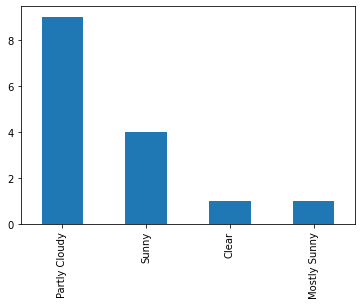

In [207]:
bengrir_climat['day_climate'].value_counts().plot(kind='bar')

# We can use also the function countplot from seaborn library:
#import seaborn as sns
#sns.countplot(df['colour'], color='gray')

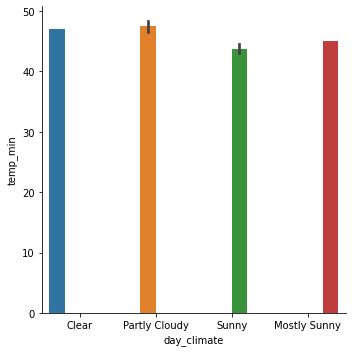

In [163]:
sns.catplot(data=bengrir_climat, x="day_climate", y="temp_min", hue="day_climate", kind="bar")

#### Use matplotlib library to plot the raining days of the two cities in the same figure.

>I consider the raining day, the day when it is Partly Cloudy for both cities then I apply a conditionning selection from datatset as follow:

In [211]:
raining_days_bg = bengrir_climat.query('day_climate == "Partly Cloudy"')
raining_days_tg = tanger_climat.query('day_climate == "Partly Cloudy"')
raining_days_bg.head()

,temp_day,temp_max,temp_min,day_climate
1,Sun 18,72°,47,Partly Cloudy
2,Mon 19,73°,45,Partly Cloudy
3,Tue 20,73°,45,Partly Cloudy
9,Mon 26,71°,49,Partly Cloudy
10,Tue 27,70°,47,Partly Cloudy


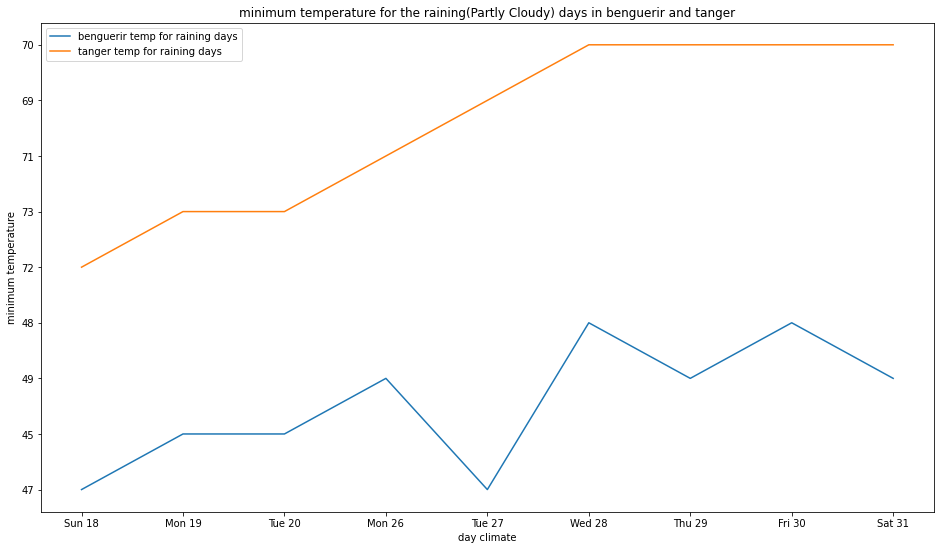

In [215]:
#plot the average temperature for the next 10 days in benguerir and tanger
plt.figure(figsize=(16,9))
plt.plot(raining_days_bg['temp_day'],raining_days_bg['temp_min'],label='benguerir temp for raining days')
plt.plot(raining_days_tg['temp_day'],raining_days_tg['temp_min'],label='tanger temp for raining days')
plt.xlabel('day climate')
plt.ylabel('minimum temperature')
plt.title('minimum temperature for the raining(Partly Cloudy) days in benguerir and tanger')
plt.legend()
plt.show()